In [11]:
import numpy as np

In [12]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [13]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

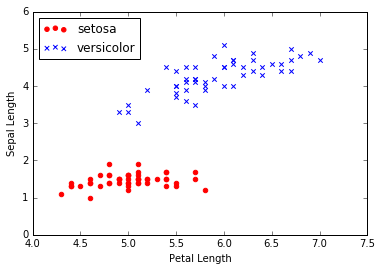

In [15]:
y = df.iloc[0:100,4].values
y = np.where( y== 'Iris-setosa', -1, 1 )
X = df.iloc[0:100, [0,2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.show()

In [21]:
#     ADAptive LInear NEuron (ADALINE) by Bernard Widrow and Tedd Hoff 
#     Illustrates the key concept of defining and minimizing cost functions, 
#     which will lay the ground work for understanding more advanced machine learning algorithms for classification, 
#     such as logistic regression and support vector machines, etc.

#     Key difference between Widrow-Hoff rule and Rosenblatt's Perceptron is that
#     the weights are updated based on a linear activation function rather than a unit step function
#     i.e., [1 x] * weights - sum - linear activation - (compute errors) - quantizer - output

#     Compared to Rosenblatt's Perceptron, in ADALINE, the weight update is calculated based on all samples
#     in the training set (instead of updating the weights incrementally after each sample),
#     which is why this approach is also referred to as "batch" gradient descent.
class AdalineGD(object):
    """
    Parameters: eta, num_iter
    Attributes: weights, errors
    """
    
    def __init__(self, eta=0.01, num_iter=10):
        self.eta = eta
        self.num_iter = num_iter
        
    def fit(self, X, y):
        """
        X: {array-like}, shape=[num_samples, num_features]
        y: {array-like}, shape=[num_samples]
        """
        self.weights = np.zeros(1+X.shape[1]) # 1 for bias
        self.cost = []
        
        for i in range(self.num_iter):
            output = self.net_input(X)
            errors = (y-output)
            self.weights[1:] += self.eta * X.T.dot(errors)
            self.weights[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

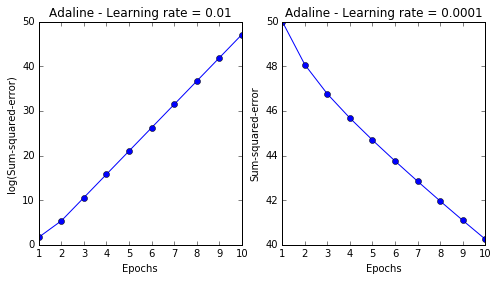

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
classifier1 = AdalineGD(eta=0.1, num_iter=10)
classifier1.fit(X, y)
ax[0].plot(range(1,len(classifier1.cost)+1), np.log10(classifier1.cost), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate = 0.01')

classifier2 = AdalineGD(eta=0.0001, num_iter=10)
classifier2.fit(X, y)
ax[1].plot(range(1,len(classifier2.cost)+1), classifier2.cost, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate = 0.0001')
plt.show()